# Workshop name

**Author:** Martin Beneš, Verena Lachner

<div style="text-align: center">
<img src="https://www.uibk.ac.at/media/filer_public/00/c3/00c369ba-9e7a-42a4-9f73-466c81dc951a/universitaet-innsbruck-logo-cmyk-farbe.jpg" style="height: 5em; display: inline; padding-right: 2em" />
<img src="https://www.uncoverproject.eu/wp-content/uploads/2021/05/UNCOVER-Logog-440x92.5-final-1.0.png" style="height: 4em; display: inline; padding-left: 2em" />
</div>

<div style="text-align: center">
<a href="https://www.github.com/uibk-uncover/mip-stego-demo">
github.com/uibk-uncover/mip-stego-demo
</a>
</div>

## What is steganography?

### Steganography is the art and science of hiding a secret message in an inconspicuous cover object

Today, our cover object is a digital image

## Notebook setup

For this notebook, we will use a sample image `00001.tif` from ALASKA database. Run following code chunk to download it.

In [2]:
# download 00001.tif from ALASKA website
import requests
res = requests.get('http://alaska.utt.fr/DATASETS/ALASKA_v2_TIFF_512_COLOR/00001.tif', verify=False)
with open('00001.tif', 'wb') as f:
    f.write(res.content)

/home/verena/anaconda3/lib/python3.9/site-packages/urllib3/connectionpool.py:1043: InsecureRequestWarning: Unverified HTTPS request is being made to host 'alaska.utt.fr'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


In [1]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import scipy.stats
import seaborn as sns
import string
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
np.set_printoptions(threshold=99)
#plt.rcParams["figure.figsize"] = (12, 3)
np.random.seed(12345)  # for reproducibility
#
from matplotlib.pyplot import imshow, legend, ylim
from numpy import sum, histogram
from numpy.random import choice
from scipy.stats import chi2
from seaborn import histplot
#
im = Image.open('../img/nockspitze.png')  # load image
cover = np.array(im.convert('L'))  # PIL to numpy

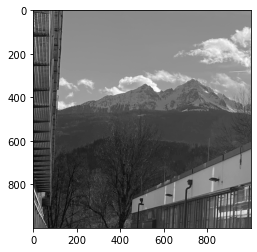

In [2]:
plt.imshow(cover,cmap = "gray");

## LSB Replacement Steganography

Idea: A human cannot distinguish between neighboring color values.

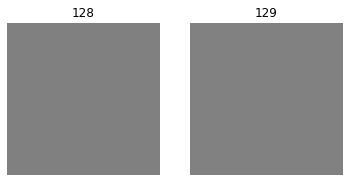

In [10]:
fig, ax = plt.subplots(1, 2, sharey=True)
for i, v in enumerate([0, 1]):
    ax[i].imshow([[128+v]], vmin=0, vmax=255, cmap='gray');
    ax[i].set_title(f'{128+v}');
    ax[i].axis('off');
    

Not even when they are joined together, really

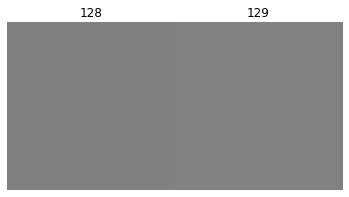

In [9]:
fig, ax = plt.subplots(1, 2, sharey=True)
for i, v in enumerate([0, 1]):
    ax[i].imshow([[128+v]], vmin=0, vmax=255, cmap='gray');
    ax[i].set_title(f'{128+v}');
    ax[i].axis('off');
    fig.subplots_adjust(wspace=0);

We will use that to hide our secret message

### A computer sees everything as 0s and 1s

| What we see      |     What a computer sees        |
|:----------------:|:-------------------------------:|
| "hi"             |     $01101000$ $01101001$       |
| $129$            |           $10000001$            |
| $128$            |           $10000000$            |

### Idea: Replace least significant bit (LSB) by message bit

In [17]:
from PIL import ImageDraw
from PIL import ImageFont

In [52]:
secret_message = "011010..."
print("secret message: " + secret_message)

secret message: 011010...


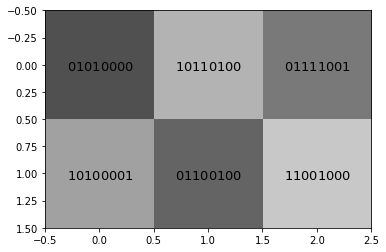

In [46]:
matrix = np.array([  
    [ 80, 180, 121],
    [161, 100, 200],
], dtype='uint8');
plt.imshow(matrix, cmap='gray', vmin=0, vmax=255);
#Add text over image
eq0 = r"$01010000$";
eq1 = r"$10110100$";
eq2 = r"$01111001$";
eq3 = r"$10100001$";
eq4 = r"$01100100$";
eq5 = r"$11001000$";
plt.text(-0.30, 0.05, eq0, {'color': '0', 'fontsize': 13});
plt.text(0.7, 0.05, eq1, {'color': '0', 'fontsize': 13});
plt.text(1.7, 0.05, eq2, {'color': '0', 'fontsize': 13});
plt.text(-0.3, 1.05, eq3, {'color': '0', 'fontsize': 13});
plt.text(0.7, 1.05, eq4, {'color': '0', 'fontsize': 13});
plt.text(1.7, 1.05, eq5, {'color': '0', 'fontsize': 13});


### Idea: Replace least significant bit (LSB) by message bit

In [53]:
#color that in using colored
#from colored import fg

#color = fg('blue')
#print (color + 'Hello World !!!')

secret_message = "011010..."
print("secret message: " + secret_message)

secret message: 011010...


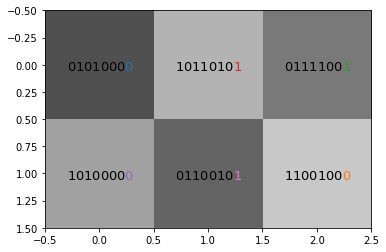

In [79]:
matrix = np.array([  
    [ 80, 180, 121],
    [161, 100, 200],
], dtype='uint8');
plt.imshow(matrix, cmap='gray', vmin=0, vmax=255);
#Add text over image
eq0 = r"$0101000$";
eq0lsb = r"$0$";
eq1 = r"$1011010$";
eq1lsb = r"$1$";
eq2 = r"$0111100$";
eq2lsb = r"$1$";
eq3 = r"$1010000$";
eq3lsb = r"$0$";
eq4 = r"$0110010$";
eq4lsb = r"$1$";
eq5 = r"$1100100$";
eq5lsb = r"$0$";
plt.text(-0.30, 0.05, eq0, {'color': '0', 'fontsize': 13});
plt.text(0.23, 0.05, eq0lsb, {'color': 'C0', 'fontsize': 13});
plt.text(0.7, 0.05, eq1, {'color': '0', 'fontsize': 13});
plt.text(1.23, 0.05, eq1lsb, {'color': 'C3', 'fontsize': 13});
plt.text(1.7, 0.05, eq2, {'color': '0', 'fontsize': 13});
plt.text(2.23, 0.05, eq2lsb, {'color': 'C2', 'fontsize': 13});
plt.text(-0.3, 1.05, eq3, {'color': '0', 'fontsize': 13});
plt.text(0.23, 1.05, eq3lsb, {'color': 'C4', 'fontsize': 13});
plt.text(0.7, 1.05, eq4, {'color': '0', 'fontsize': 13});
plt.text(1.23, 1.05, eq4lsb, {'color': 'C6', 'fontsize': 13});
plt.text(1.7, 1.05, eq5, {'color': '0', 'fontsize': 13});
plt.text(2.23, 1.05, eq5lsb, {'color': 'C1', 'fontsize': 13});


## How do we implement it?

## Real embedding

Pass the super secret message you want to embed.

In [4]:
# message

##In the following, we are generating a long message with random characters.
##Instead, you could simply give Python your own secret message as a String
#message = 'super secret secret!'

N = int(cover.size * .5) // 8 #This is how long we want our message to be
rng = np.random.default_rng(12345) 
message = ''.join(rng.choice(list(string.ascii_letters+string.digits), size=N))
len(message)

62500

Translate the message to 0s and 1s and add a stop code "000000000"

In [5]:
# encode
message_bits = []
for bit in message.encode('ascii') + b'\x00': # <- stop code
    for i in range(8):
        message_bits.append((bit >> i) & 1) # turn characters into 0s and 1s
message_bits = np.array(message_bits)
len(message_bits)

500008

We, for now, just want to embed the message sequentially starting from the first pixel

In [6]:
# set order
perm = np.linspace(0, cover.size-1, cover.size, dtype='int64')

Now, for each pixel, we replace its LSB by the respective message bit

In [7]:
# iterate elements
stego = cover.copy() #copy the cover

for i, it in enumerate(perm):
    # message exhausted (we are at end of message)
    if len(message_bits) <= i:
        break
        
    # get index (x- and y-coordinate of pixel we want to change)
    idx = it // cover.shape[1], it % cover.shape[1]
    
    # make change
    stego[idx] &= ~0 << 1
    stego[idx] |= message_bits[i]

We successfully embedded. 
As proof I will show you the difference between cover and stego image

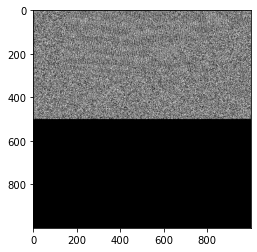

In [8]:
plt.imshow(cover != stego, vmin=0, vmax=1, cmap='gray');

## But we have a problem

Because we embedded sequentially into a very homogeneous region (the sky), 
our modifications are obvious if we look only into the LSB plane

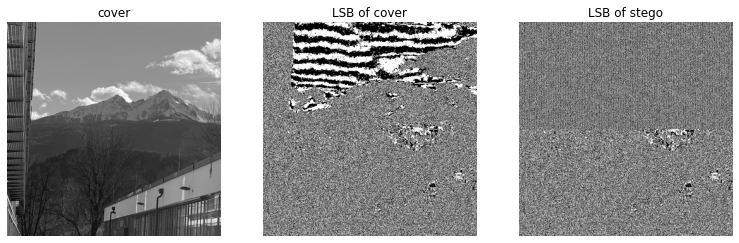

In [16]:
fig, ax = plt.subplots(1, 3, figsize=(13, 13), sharey=False)

ax[0].imshow(cover, cmap = "gray");
ax[1].imshow(cover & 1, cmap = "gray");
ax[2].imshow(stego & 1, cmap = "gray");
ax[0].set_title(f'cover');
ax[1].set_title(f'LSB of cover');
ax[2].set_title(f'LSB of stego');
ax[0].axis('off');
ax[1].axis('off');
ax[2].axis('off');

How can we overcome this problem?

## By spreading our message bits out along a pseudorandom path

Pseudorandom means that something appears random,
but I can recreate the exact same thing if I know the seed/key with which it was created.

For example the landscape in minecraft is pseudorandom.

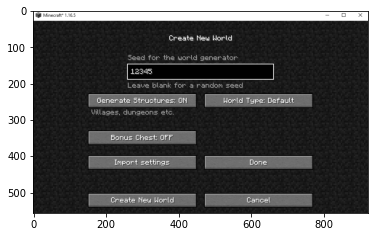

In [17]:
img = Image.open('../img/minecraft_seed.png')  # load image
minecraft = np.array(img.convert('L'))  # PIL to numpy
plt.imshow(minecraft,cmap = "gray");

Now we can do switch out where we choose to embed.

In [18]:
# set order
perm = np.linspace(0, cover.size-1, cover.size, dtype='int64')

## permuted walk-through
rng = np.random.default_rng(12345) # <- here we choose the seed
perm = rng.permutation(perm) # <- this shuffles our order around 

Everything else during the embedding process stays the same

The differences in pixels between cover and permuted_stego look like this

In [19]:
# iterate elements
stego = cover.copy() #copy the cover

for i, it in enumerate(perm):
    # message exhausted (we are at end of message)
    if len(message_bits) <= i:
        break
        
    # get index (x- and y-coordinate of pixel we want to change)
    idx = it // cover.shape[1], it % cover.shape[1]
    
    # make change
    stego[idx] &= ~0 << 1
    stego[idx] |= message_bits[i]

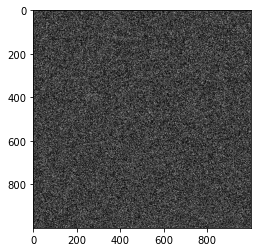

In [20]:
plt.imshow(cover != stego, vmin=0, vmax=1, cmap='gray');

And the LSB planes now look like this. Success!

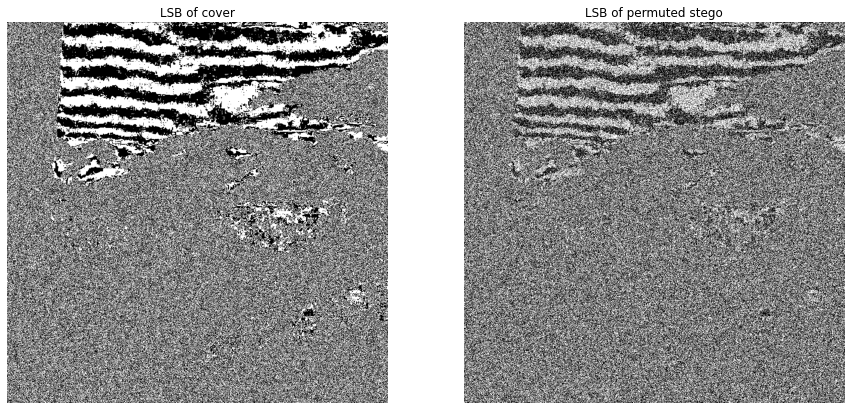

In [21]:
fig, ax = plt.subplots(1, 2, figsize=(15, 15), sharey=False)

ax[0].imshow(cover & 1, cmap = "gray");
ax[1].imshow(stego & 1, cmap = "gray");
ax[0].set_title(f'LSB of cover');
ax[1].set_title(f'LSB of permuted stego');
ax[0].axis('off');
ax[1].axis('off');

## Message extraction

In Stego image: Gather LSB bits of pixels along pseudorandom path and convert into characters/letters.

In [100]:
# Gather LSB bits along pseudorandom path
message_bits_extracted = []
for i, it in enumerate(perm): # <- walk along the same pseudorandom path
    # get index (x- and y-coordinate)
    idx = it // stego.shape[1], it % stego.shape[1]
        
    # get message bit
    message_bits_extracted.append(stego[idx] & 1)

    # check end
    if (i + 1) % 8 == 0: # <- if we hit our stop code '00000000'
        if all([b == 0 for b in message_bits_extracted[-8:]]):
            break

In [101]:
# convert to characters
message_bytes_extracted = b''
for i in range(len(message_bits_extracted)//8):
    char_bits = list(message_bits_extracted[i*8:(i+1)*8])

    # decode the byte
    byte = 0
    for i, bit in enumerate(char_bits):
        byte |= bit << i
    message_bytes_extracted += int(byte).to_bytes(1, byteorder='big')

# remove tracing zero
message_extracted = bytes.decode(message_bytes_extracted, 'ascii').split('\0')[0]

In [102]:
message == message_extracted

True

## Take-away messages

- We can hide a message in the LSBs of an image
- Sequential embedding is noticable in homogeneous regions of an image
- Instead: use permuted embedding
- This requires the exchange of a seed/key

## Hands-on: LSBr

- Embed and extract your own secret message


In [ ]:
message = 'super secret secret!'
print(message_extracted)